**RECOMENDAÇÕES DE SITES**


In [8]:
!python -m spacy download pt
!python -m spacy download en
!pip install spacy
!pip install beautifulsoup4

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependenc

In [9]:
import nltk
import spacy
from spacy import displacy
import tqdm
import operator
import requests
from bs4 import BeautifulSoup
import re
import pt_core_news_sm
import en_core_web_sm
from collections import Counter
import random
import operator
import matplotlib.pyplot as plt

1) Utilizamos a função de leitura do site G1, com notícias diversas para fazer o processamento de Recomendação de sites

0-> https://g1.globo.com/tecnologia/noticia/2024/05/28/vale-a-pena-trabalhar-com-inteligencia-artificial-da-dinheiro-veja-dicas-de-brasileiros-que-ja-estao-na-area.ghtml

1-> https://g1.globo.com/sp/campinas-regiao/em-cena/noticia/2024/05/30/maravilhas-de-campinas-votacao-no-g1-vai-definir-5-lugares-que-serao-tema-de-reportagens-da-eptv-sobre-os-250-anos-da-metropole.ghtml

2-> https://g1.globo.com/fato-ou-fake/noticia/2024/05/30/e-fake-video-de-carol-prado-do-g1-em-1-minuto-sobre-indenizacao-da-serasa.ghtml

3-> https://g1.globo.com/rj/rio-de-janeiro/noticia/2024/05/30/policia-apura-se-brigadeirao-envenenado-por-namorada-levou-empresario-a-morte-no-rio.ghtml

4-> https://g1.globo.com/mundo/noticia/2024/05/30/trump-e-considerado-culpado-julgamento.ghtml

5-> https://g1.globo.com/tecnologia/noticia/2024/05/29/ganho-mais-de-r-20-mil-por-mes-entrei-crua-e-foi-dificil-no-inicio-como-e-trabalhar-na-area-da-inteligencia-artificial.ghtml

6-> https://g1.globo.com/sp/campinas-regiao/noticia/2023/10/24/inteligencia-artificial-cria-cerveja-da-receita-ao-nome-em-um-mes-g1-experimenta-novidade.ghtml

7-> https://g1.globo.com/sp/campinas-regiao/noticia/2024/05/21/inteligencia-artificial-que-confirma-consultas-pelo-whatsapp-chega-a-12-centros-de-saude-e-campinas-programa-uso-em-toda-rede.ghtml

8-> https://g1.globo.com/mundo/noticia/2024/05/30/quem-e-stormy-daniels-ex-atriz-porno-no-centro-da-condenacao-de-donald-trump.ghtml

9-> https://g1.globo.com/meio-ambiente/noticia/2024/05/30/caos-climatico-graficos-mostram-que-efeitos-do-aquecimento-global-estao-mais-intensos-em-2024-entenda.ghtml

In [5]:
def match_class(target):
    def do_match(tag):
        classes = tag.get('class', [])
        return all(c in classes for c in target)
    return do_match

def get_text_url(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    #remove marcações de scripts e style
    texto = soup.find_all(match_class(["content-text__container"]))
    all_text = ""
    for t in texto:
        all_text += t.get_text()
    return all_text

In [7]:
noticias = {}
noticias[0] = "https://g1.globo.com/tecnologia/noticia/2024/05/28/vale-a-pena-trabalhar-com-inteligencia-artificial-da-dinheiro-veja-dicas-de-brasileiros-que-ja-estao-na-area.ghtml"
noticias[1] = "https://g1.globo.com/sp/campinas-regiao/em-cena/noticia/2024/05/30/maravilhas-de-campinas-votacao-no-g1-vai-definir-5-lugares-que-serao-tema-de-reportagens-da-eptv-sobre-os-250-anos-da-metropole.ghtml"
noticias[2] = "https://g1.globo.com/fato-ou-fake/noticia/2024/05/30/e-fake-video-de-carol-prado-do-g1-em-1-minuto-sobre-indenizacao-da-serasa.ghtml"
noticias[3] = "https://g1.globo.com/rj/rio-de-janeiro/noticia/2024/05/30/policia-apura-se-brigadeirao-envenenado-por-namorada-levou-empresario-a-morte-no-rio.ghtml"
noticias[4] = "https://g1.globo.com/mundo/noticia/2024/05/30/trump-e-considerado-culpado-julgamento.ghtml"
noticias[5] = "https://g1.globo.com/tecnologia/noticia/2024/05/29/ganho-mais-de-r-20-mil-por-mes-entrei-crua-e-foi-dificil-no-inicio-como-e-trabalhar-na-area-da-inteligencia-artificial.ghtml"
noticias[6] = "https://g1.globo.com/sp/campinas-regiao/noticia/2023/10/24/inteligencia-artificial-cria-cerveja-da-receita-ao-nome-em-um-mes-g1-experimenta-novidade.ghtml"
noticias[7] = "https://g1.globo.com/sp/campinas-regiao/noticia/2024/05/21/inteligencia-artificial-que-confirma-consultas-pelo-whatsapp-chega-a-12-centros-de-saude-e-campinas-programa-uso-em-toda-rede.ghtml"
noticias[8] = "https://g1.globo.com/mundo/noticia/2024/05/30/quem-e-stormy-daniels-ex-atriz-porno-no-centro-da-condenacao-de-donald-trump.ghtml"
noticias[9] = "https://g1.globo.com/meio-ambiente/noticia/2024/05/30/caos-climatico-graficos-mostram-que-efeitos-do-aquecimento-global-estao-mais-intensos-em-2024-entenda.ghtml"

In [10]:
texto_noticias = {i:get_text_url(noticias[i]) for i in noticias.keys()}

In [11]:
texto_noticias.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
texto_noticias[5]

' O setor de IA está aquecido e o salário para quem domina essa tecnologia pode variar entre R$ 5 mil e R$ 16 mil, segundo uma plataforma de emprego.  No entanto, muitas empresas têm dificuldade para contratar profissionais qualificados que sabem lidar com essa tecnologia.  O g1 conversou com três jovens que já trabalham com IA e eles contam como tem sido atuar nesse ramo que ganhou ainda mais relevância há dois anos.  Camilly Alves, Heinz Felipe e Heloisy Pereira. O que estes três brasileiros com menos de 30 anos têm em comum? Eles decidiram largar suas áreas "dos sonhos" para apostar em um ramo novo e que não dominavam: inteligência artificial (IA).  Mudar a rota para investir na IA foi a melhor decisão possível, afirmam. Dois deles decidiram abandonar a medicina para tentar trabalhar no setor, que está aquecido.  Muitas empresas estão investindo nessa inovação e são poucas as pessoas que realmente têm o domínio dessa tecnologia.  A média salarial para a área no Brasil está entre R$ 

2) Pre-processamento do texto e remoção de stopwords.

In [24]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [49]:
def pre_processamento_texto_return_str(corpus):
  #tokenizacao
  corpus_alt = re.findall(r"\w+(?:'w+)?|^\w\s]", corpus)
   #remove stopwprds
  portugues_stops = stopwords.words('portuguese')
  corpus_alt = [t for t in corpus_alt if t not in portugues_stops]
  #remove numeros
  corpus_alt = [re.sub(r'\d','', t) for t in corpus_alt]
  #remove pontuacao
  corpus_alt = [t for t in corpus_alt if t not in string.punctuation]


  corpus_alt_str = ' '.join(corpus_alt).lower()


  return corpus_alt_str

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
#Manter o texto pre-processado como tuplas separado por chaves
texto_noticias_clean = {}
for k, v in texto_noticias.items():
    texto_noticias_clean[k] = pre_processamento_texto_return_str(v)

In [44]:
texto_noticias_clean.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
texto_noticias_clean

{0: 'com boom chatgpt final muitas empresas passaram correr incorporar inteligência artificial estruturas só especialistas ia escassos mercado atual segundo estudo consultoria robert half o g conversou profissionais ia executivos grandes empresas professores entender melhor mercado eles compartilham dicas deseja entrar área o objetivo vida trabalhar saúde abrir clínica meu pai estimulava ir tecnologia acreditava mim eu sabia nada ti conta recifense camilly alves apenas anos agora profissional inteligência artificial ia a jovem mudou são paulo estudar ia atualmente trabalha grande banco relata frequentemente procurada recrutadores linkedin e ocorre porque ainda poucas pessoas realmente dominam tecnologia para ter ideia além profissionais segurança informação computação nuvem cloud especialistas ia escassos mercado atual segundo estudo consultoria robert half publicado final ao tempo embora ia tecnologia tão nova agora empresas começaram correr incorporá la estruturas especialmente após 


4) Capturamos as entidades de cada uma das notícias utilizando o modelo ``pt_core_news_sm`` do spacy.



In [53]:
nlp = spacy.load("pt_core_news_sm")

Exemplo utilizando o texto pre-processado

In [54]:
exemplo = nlp(texto_noticias_clean[7])

In [56]:
%%time
texto_noticias_clean_nlp = {i:nlp(texto_noticias_clean[i]) for i in texto_noticias_clean.keys()}

CPU times: user 666 ms, sys: 4.37 ms, total: 671 ms
Wall time: 671 ms


In [58]:
%%time
texto_noticias_clean_nlp_entidades = {i:texto_noticias_clean_nlp[i].ents for i in texto_noticias_clean_nlp.keys()}

CPU times: user 473 µs, sys: 0 ns, total: 473 µs
Wall time: 480 µs


In [61]:
%%time
entidades = {i:set(map(str,(texto_noticias_clean_nlp[i].ents))) for i in texto_noticias_clean_nlp.keys()}

CPU times: user 655 µs, sys: 0 ns, total: 655 µs
Wall time: 660 µs


In [60]:
entidades

{0: {'brasil',
  'camilly alves',
  'canadá',
  'chris faig vice',
  'clt',
  'diogo cortiz',
  'faculdade claro',
  'heinz felipe',
  'john paul',
  'machine',
  'machine learning júnior',
  'mercado gemini',
  'microsoft',
  'microsoft brasil',
  'robert half',
  'robert half o',
  'são paulo',
  'ufg',
  'universidade federal'},
 1: {'campinas', 'sp', 'unicamp'},
 2: {'brasil',
  'carol',
  'confederação',
  'confederação nacional',
  'fake',
  'fake circula facebook publicidade',
  'fake news',
  'https',
  'https pjeg',
  'listview',
  'pix',
  'serasa',
  'serasa empresa brasileira',
  'serasa experian',
  'viviane barreto',
  'youtube'},
 3: {'cabo frio',
  'denúncia',
  'júlia',
  'júlia andrade cathermol',
  'luiz',
  'luiz júlia andrade cathermol',
  'luiz júlia sexta',
  'luiz marcelo',
  'luiz marcelo antônio ormond',
  'luiz segunda',
  'luiz vivo',
  'suyane breschak amiga júlia'},
 4: {'alvin bragg',
  'biden trump',
  'david',
  'donald trump',
  'eleições joe biden',
 



5) Para a notítica 0, imprimimos quais foram os tipos das entidades encontradas e plotamos um gráfico com esses dados.
Em seguida fizemos uma análise desse resultado



In [125]:
#Retornando os labels do texto 0
labels_2 = {str(ent):ent.label_ for ent in texto_noticias_clean_nlp_entidades[0]}

In [126]:
labels_2

{'robert half o': 'PER',
 'camilly alves': 'PER',
 'são paulo': 'LOC',
 'robert half': 'PER',
 'brasil': 'LOC',
 'heinz felipe': 'PER',
 'universidade federal': 'LOC',
 'ufg': 'LOC',
 'canadá': 'LOC',
 'mercado gemini': 'MISC',
 'microsoft': 'ORG',
 'chris faig vice': 'PER',
 'microsoft brasil': 'MISC',
 'machine learning júnior': 'PER',
 'machine': 'MISC',
 'clt': 'MISC',
 'diogo cortiz': 'PER',
 'faculdade claro': 'ORG',
 'john paul': 'PER'}

In [127]:
labels_2_count = Counter(labels_2.values())

In [128]:
labels_2_count

Counter({'PER': 8, 'LOC': 5, 'MISC': 4, 'ORG': 2})

<BarContainer object of 4 artists>

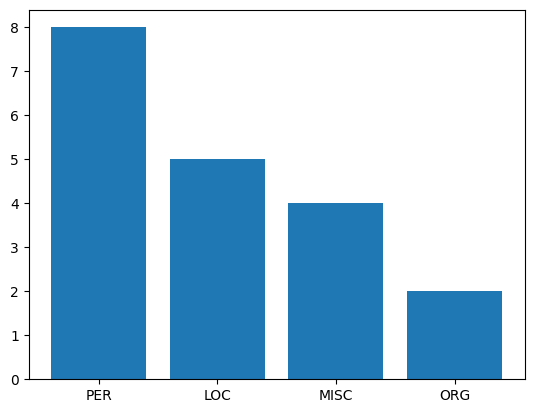

In [104]:
plt.bar(labels_2_count.keys(), labels_2_count.values())

In [132]:
#Retornando os labels do texto 7
labels = [ent.label_ for ent in texto_noticias_clean_nlp_entidades[7]]

In [133]:
labels = Counter(labels)

In [134]:
labels

Counter({'LOC': 2, 'PER': 2})

<BarContainer object of 2 artists>

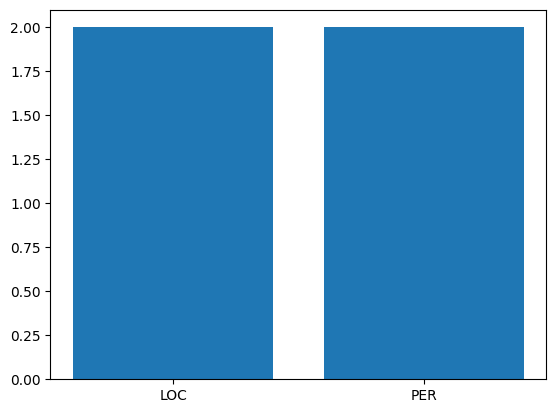

In [135]:
plt.bar(labels.keys(), labels.values())



6) Imprimimos a notícia 0, colorindo as entidades encontradas, para isto utilizamos o método abaixo:

```python
displacy.render(doc, jupyter=True, style='ent')
```


In [106]:
displacy.render(texto_noticias_clean_nlp[0], jupyter=True, style='ent')



7) Trazendo aplicação de similaridade com método jaccard, utilizamos o documento 0 como referência para calcular a similaridade das entidades do documento 0 com todos outros 9.

In [109]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [129]:
for i in range(len(entidades)):
  print(i, jaccard_similarity(entidades[0],entidades[i]))

0 1.0
1 0.0
2 0.029411764705882353
3 0.0
4 0.0
5 0.2413793103448276
6 0.0
7 0.0
8 0.0
9 0.0


In [138]:
texto_noticias_clean[0]

'com boom chatgpt final muitas empresas passaram correr incorporar inteligência artificial estruturas só especialistas ia escassos mercado atual segundo estudo consultoria robert half o g conversou profissionais ia executivos grandes empresas professores entender melhor mercado eles compartilham dicas deseja entrar área o objetivo vida trabalhar saúde abrir clínica meu pai estimulava ir tecnologia acreditava mim eu sabia nada ti conta recifense camilly alves apenas anos agora profissional inteligência artificial ia a jovem mudou são paulo estudar ia atualmente trabalha grande banco relata frequentemente procurada recrutadores linkedin e ocorre porque ainda poucas pessoas realmente dominam tecnologia para ter ideia além profissionais segurança informação computação nuvem cloud especialistas ia escassos mercado atual segundo estudo consultoria robert half publicado final ao tempo embora ia tecnologia tão nova agora empresas começaram correr incorporá la estruturas especialmente após surg

In [130]:
texto_noticias_clean[2]

'circula redes sociais vídeo jornalista carol prado g supostamente diz possível receber r mil r mil indenização serasa é fake o vídeo utiliza imagem carol prado g insere áudio falso gerado inteligência artificial uma voz simula diz oi pessoal tudo bem começou hoje prazo pessoas vão receber indenização serasa sacar valores r mil r mil vazamento dados após finalização consegue saber valor disponível pra aí solicitar saque via pix inclusive sabia tido dados vazados descobri solicitei saque recebi mesma hora uma legenda afirma o senado aprova medida determina serasa arque indenizações r mil cada afetados vazamento dados o g publicou conteúdo teor tampouco carol prado gravou vídeo tipo a imagem manipulação fraudulenta vídeo aproveita imagens reais edição g minuto publicada youtube março carol prado falava sobre resgate dinheiro esquecido contribuintes bancos duas ferramentas detecção apontaram áudio falsamente atribuído carol prado criado inteligência artificial veja abaixo vídeo autêntico 

In [131]:
texto_noticias_clean[5]

'o setor ia aquecido salário domina tecnologia pode variar r mil r mil segundo plataforma emprego no entanto muitas empresas têm dificuldade contratar profissionais qualificados sabem lidar tecnologia o g conversou três jovens trabalham ia contam sido atuar nesse ramo ganhou ainda relevância dois anos camilly alves heinz felipe heloisy pereira o três brasileiros menos anos têm comum eles decidiram largar áreas sonhos apostar ramo novo dominavam inteligência artificial ia mudar rota investir ia melhor decisão possível afirmam dois decidiram abandonar medicina tentar trabalhar setor aquecido muitas empresas investindo nessa inovação poucas pessoas realmente têm domínio dessa tecnologia a média salarial área brasil r mil r mil segundo plataforma emprego glassdoor os valores levantados abril plataforma especifica considera contratos clt pj segundo heloisy considerada primeira mulher bacharel ia brasil pessoas turma cursaram graduação ia ganhando média r mil r mil mês alguns trabalhado empr

# EXEMPLO 2: Familiaridade considerando o texto 7 como referência para os demais.

In [136]:
for i in range(len(entidades)):
  print(i, jaccard_similarity(entidades[7],entidades[i]))

0 0.0
1 0.5
2 0.0
3 0.0
4 0.0
5 0.0
6 0.18181818181818182
7 1.0
8 0.0
9 0.0


In [139]:
texto_noticias_clean[7]

'doze centros saúde campinas sp começaram segunda feira utilizar assistente virtual ana comunicar pacientes whatsapp sobre consultas exames agendado a expectativa secretaria municipal campinas todos postos usem inteligência artificial ia fim desta semana a fase testes iniciada janeiro mostrou redução percentual faltas segundo secretaria o alto número pacientes agendam comparecem consultas principal gargalo pasta busca combater medida veja abaixo lista postos passaram usar ia a secretaria sustenta além reduzir faltas ia pode auxiliar otimizar vagas disponíveis pacientes indicarem antecedência ausência consultas podem dar lugar outras pessoas agilizando agenda cada centro saúde como funciona por meio whatsapp ia chamada ana envia mensagens número semana antes consultas exames se paciente confirmar presença ainda receberá nova mensagem véspera relembrar marcação leia já paciente cancelar agendamento equipe centro saúde tempo reagendar outra pessoa fila espera não possível enviar mensagens

In [137]:
texto_noticias_clean[1]

'a cidade campinas sp completa anos julho para celebrar marca em cena quadro vai ar jornal eptv ª edição todos sábados parceria g preparou concurso eleger cinco maravilhas metrópole as atrações tema reportagens especiais mês aniversário foram escolhidos patrimônios representativos história cidade desde locais antigos catedral metropolitana estação cultura avançados laboratórios centros pesquisa cnpem unicamp a enquete começa nesta quinta feira vai próxima sexta feira junho h o resultado revelado em cena sábado junho para participar clicar neste link conheça candidatos abaixo veja notícias região g campinas'

In [116]:
texto_noticias_clean[6]

'com intenção mostrar inteligência artificial ia pode utilizada diferentes áreas empresa tecnologia campinas sp recorreu computador criar nova cerveja da receita escolha nome tudo a i p a artificial intelligence pale ale ficou cargo ferramenta e ideia copo preciso apenas mês o g experimentou cerveja estará disponível venda público partir sexta feira apenas local cidade holambra sp cervejaria parceira ajudou produzir ia elaborou veja abaixo preço estimado endereço um mérito a i p a entrega promete desenvolvida agradar pessoal área ti processo criação informado inteligência artificial ia tal público gosta café sabor grão presente tanto aroma quanto paladar a gente queria fazer cerveja fizesse sentido área ti inovação então aí começou surgir café ideia laranja quebrar pouco a gente conversando ia receita após interação veio pronta explica gustavo scalzilli responsável cervejaria seo carneiro onde a i p a comercializada aos primeiros goles bebida desenvolvida ia inégavel estranha sensação 